In [1]:
import numpy as np
import numpy.linalg as alg
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns


### Import Data

In [2]:
df = pd.read_csv('ceph_hgdp_minor_code_XNA.betterAnnotated.csv')
df.head(6)

,snp,chr,pos,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
0,rs10000929,4,131516474,1,0,0,1,1,0,1,...,1,0,1,0,0,2,0,0,0,2
1,rs10002472,4,159087423,2,1,2,2,0,2,2,...,2,2,2,1,2,1,1,2,0,2
2,rs10005550,4,128697858,2,2,2,2,1,0,1,...,2,2,2,1,2,2,2,2,1,2
3,rs10007576,4,59063992,2,0,2,1,2,2,2,...,2,1,2,1,2,2,1,1,1,0
4,rs10007998,4,35988597,0,0,0,0,0,0,0,...,2,1,2,0,2,0,1,2,2,1
5,rs10010285,4,35687757,0,1,0,0,0,1,1,...,0,1,0,1,2,0,1,0,2,0


In [3]:
snp = df.drop(columns=['snp', 'chr', 'pos'])

snp.head(6)

,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,HGDP00927,HGDP00461,HGDP00451,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
0,1,0,0,1,1,0,1,1,1,1,...,1,0,1,0,0,2,0,0,0,2
1,2,1,2,2,0,2,2,1,2,2,...,2,2,2,1,2,1,1,2,0,2
2,2,2,2,2,1,0,1,1,2,2,...,2,2,2,1,2,2,2,2,1,2
3,2,0,2,1,2,2,2,1,1,2,...,2,1,2,1,2,2,1,1,1,0
4,0,0,0,0,0,0,0,0,0,1,...,2,1,2,0,2,0,1,2,2,1
5,0,1,0,0,0,1,1,1,0,2,...,0,1,0,1,2,0,1,0,2,0


In [4]:
(P, N) = snp.shape
print('The shape pf origianl dataset is {} * {}'.format(P, N))

The shape pf origianl dataset is 488919 * 1043


In [5]:
info = pd.read_csv('ceph_hgdp_minor_code_XNA.sampleInformation.csv')

info.head(6)

,ID,Gender,Population,Geographic.origin,Geographic.area,region,distance,latitude,longtitude
0,HGDP00448,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
1,HGDP00479,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
2,HGDP00985,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
3,HGDP01094,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
4,HGDP00982,M,Mbuti Pygmies,Democratic Republic of Congo,Central Africa,Africa,1335.495772,1.0,29.0
5,HGDP00911,M,Mandenka,Senegal,Central Africa,Africa,5469.912857,12.0,-12.0


### MDS Algorithm

In [6]:
k1=500 
k2=1000

R1 = np.zeros((k1, P), dtype=float)
R2 = np.zeros((k2, P), dtype=float)

for i in range(k1):
    t = random.sample(range(0, P), k1)
    R1[i, t] = 1/k1
for i in range(k2):
    t = random.sample(range(0, P), k2)
    R2[i, t] = 1/k2    

In [7]:
H = - np.ones((N, N))/N
H += np.eye(N)

X = np.array(snp)

X1 = np.dot(R1, X)
X1_centered = np.dot(X1, H)
K1 = np.dot(X1_centered.T, X1_centered)

X2 = np.dot(R2, X)
X2_centered = np.dot(X2, H)
K2 = np.dot(X2_centered.T, X2_centered)

In [8]:
eigen_values_k1, eigen_vectors_k1 = alg.eig(K1)
eigen_pairs_k1 = [ (eigen_values_k1[i], eigen_vectors_k1[:, i]) for i in range(len(eigen_values_k1))]

eigen_values_k2, eigen_vectors_k2 = alg.eig(K2)
eigen_pairs_k2 = [ (eigen_values_k2[i], eigen_vectors_k2[:, i]) for i in range(len(eigen_values_k2))]

In [9]:
eigen_pairs_k1.sort(key=lambda eigen_pairs_k1: eigen_pairs_k1[0], reverse=True)
eigen_pairs_k2.sort(key=lambda eigen_pairs_k2: eigen_pairs_k2[0], reverse=True)

In [10]:
lambda1_k1, pca1_k1 = eigen_pairs_k1[0]
pca1_k1 = pca1_k1.astype(np.float64)
cord1_k1 = math.sqrt(lambda1_k1) * pca1_k1
lambda2_k1, pca2_k1 = eigen_pairs_k1[1]
pca2_k1 = pca2_k1.astype(np.float64)
cord2_k1 = math.sqrt(lambda2_k1)* pca2_k1

lambda1_k2, pca1_k2 = eigen_pairs_k2[0]
pca1_k2 = pca1_k2.astype(np.float64)
cord1_k2 = math.sqrt(lambda1_k2) * pca1_k2
lambda2_k2, pca2_k2 = eigen_pairs_k2[1]
pca2_k2 = pca2_k2.astype(np.float64)
cord2_k2 = math.sqrt(lambda2_k2) * pca2_k2

/opt/anaconda3/envs/MATH5473/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/opt/anaconda3/envs/MATH5473/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/MATH5473/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/opt/anaconda3/envs/MATH5473/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/opt/anaconda3/envs/MATH5473/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/opt/anaconda3/envs/MATH5473/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWa

### Visualization

In [11]:
region = info['region']
keys = list(region.unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = [plt.cm.tab20b(x) for x in color_range]
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

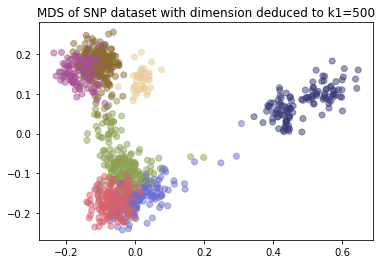

In [12]:
df1 = pd.DataFrame(dict(pca1=cord1_k1, pca2=cord2_k1, region=region))
fig1, ax1 = plt.subplots()
ax1.scatter(df1['pca1'], df1['pca2'], c=df1['region'].map(color_dict), alpha=0.5)
plt.title('MDS of SNP dataset with dimension deduced to k1=500')    
plt.show()

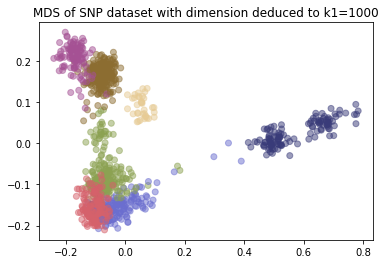

In [13]:
df2 = pd.DataFrame(dict(pca1=cord1_k2, pca2=cord2_k2, region=region))
fig2, ax2 = plt.subplots()
ax2.scatter(df2['pca1'], df2['pca2'], c=df2['region'].map(color_dict), alpha=0.5)
plt.title('MDS of SNP dataset with dimension deduced to k1=1000')
plt.show()

### Conclusion
According to the two graphs above, we can reach the same concluison as introduced in class about the SNP dataset. In this exercise, I have to constrain k to a small number because my computer cannot handle large matrix and give the result. Thus, only k = 500 and k = 1000 are tried. 